<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Sarmen_Sinanian_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

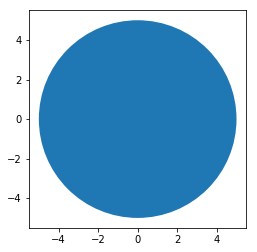

In [5]:
def create_circle():
	circle= plt.Circle((0,0), radius= 5)
	return circle

def show_shape(patch):
	ax=plt.gca()
	ax.add_patch(patch)
	plt.axis('scaled')
	plt.show()

if __name__== '__main__':
	c= create_circle()
	show_shape(c)


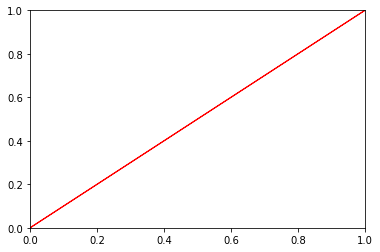

In [6]:
red = [1, 1]

plt.arrow(0,0, red[0], red[1], head_width = .05, head_length=.05,
         color = 'red')


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

#BECAUSE THEY CAN HAVE TWO INPUTS RESULTING IN THE SAME SOLUTION

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

#2 only: all other relations have a situation where 1 x value equals 2 y values

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

#m is 3 to 3
#n is 4 to 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

#NO BECAUSE IT WILL BE A REDUNDANT/NON-ESSENTIAL COLUMN WHICH CAN ONLY BE CREATED FROM SCALING OR ADDING/SUBTRACTING THE LOWER DIMENSIONAL FUNCTION'S VALUES

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

[1,-1], [3,2]

[4,-1,5], [1,2,1], [5,1,-2]

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

REDUNDANT

#NOT SURE WHAT IS BEING ASKED HERE^^

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

#EIGENVALUES = The value which is scaling an eigenvector (either bigger or smaller)
#EIGENVECTOR = A vector that does not change its orientation during a transformation (i.e. via a scalar Eigenvalue stretching or compressing it)

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

- More difficult to explore
- Too many columns with not enough rows results in overfitting which makes the model lose predictive power

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 rows per 1 column.
If more columns than rows-> extreme risk of overfit

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

## 1) Separate your data into X and Y, variables.

Remember that the y variable is the "label" or the "target" it's the thing that we want to predict. our X variables are all of the features of our data that are going ot help us to predict Y.

In [7]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [0]:
df_x = df.drop('species', axis='columns')

In [10]:
df_x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
df_y = df['species']

In [13]:
df_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [14]:
X = df_x.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
X.mean(axis=0)

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [19]:
X.std(axis=0, ddof=0)

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

## 2) Center each column at 0 by subtracting its mean.

Take the matrix of independent variables $X$ and, for each column, subtract the mean of that column from each entry. (This ensures that each column has a mean of zero.)

If we don't do this then it will appear as if one component explains most of the variance in the data and the other components explain very little.  

## 3) Divide each column by its standard deviation.

This completes the process of "standardizing" our data - giving it a mean of 0 and a standard deviation of 1. Just like we standardized our variance and covariance, this now makes the variances of our different features comparable and removes some of the concerns that were brought up when we talked about the rotated elipse of points.
 
We'll call the new standardized matrix the $Z$ matrix.

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler

Z = (X-X.mean(axis=0))/X.std(axis=0,ddof=0)


Z

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [36]:
print(np.mean(Z, axis=0))

[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]


## 4) Calculate the Variance-Covariance matrix of Z. 

Do this by calculating $Z^{T}Z$ Mind blown! - Multiplying a matrix by its transpose yields the variance-covariance matrix. 

In [37]:
Z = StandardScaler().fit_transform(X)

print(np.mean(Z.T, axis=1))

[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]


In [38]:
y = df_y.values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [48]:
from sklearn.decomposition import PCA

pcanalaysis = PCA(2)
new_data = pca.fit_transform(Z)
new_data

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [0]:
import matplotlib.pyplot as plt

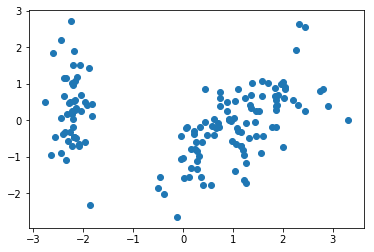

In [50]:
plt.scatter(new_data[:,0], new_data[:,1])

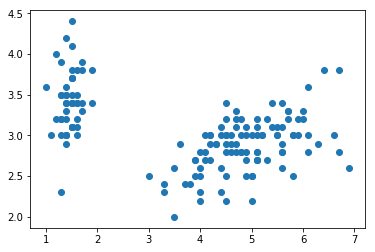

In [52]:
plt.scatter(df.petal_length, df.sepal_width)

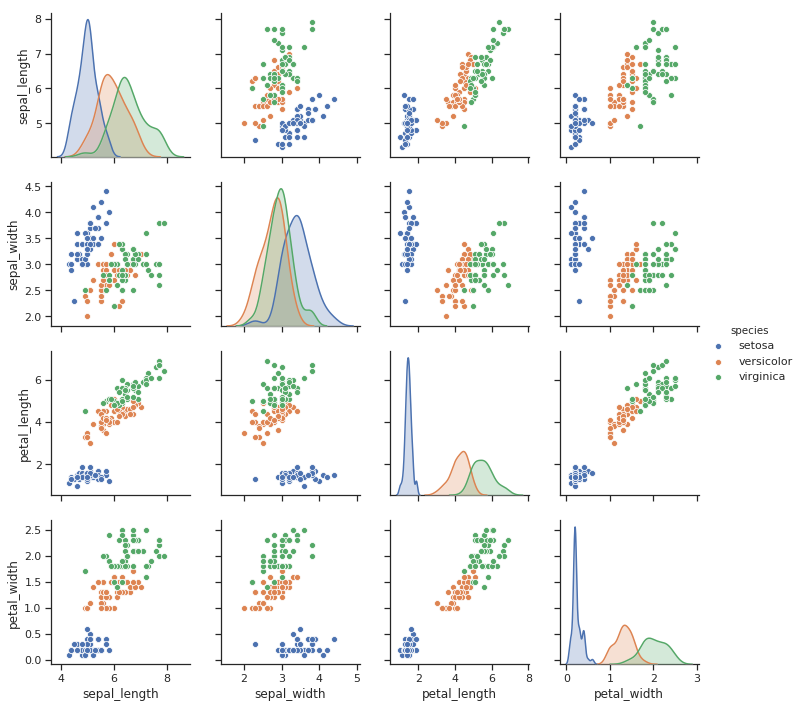

In [54]:
import seaborn as sns; sns.set(style='ticks',color_codes=True)
iris = sns.load_dataset('iris')
g = sns.pairplot(iris, hue='species')

#BELOW IS A FEATURE ADDITION PROCESS

In [55]:
df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})
df.head()

,a,b
0,1,4
1,2,5
2,3,6


In [0]:
my_list = np.array([7,8,9])

In [0]:
new_column_series = pd.Series(my_list)

In [58]:
df['c'] = new_column_series
df.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)